# Datojen haku ja esikäsittely

In [1]:
import pandas as pd

from create_shap_values_via_xgboost import create_shap_values_via_xgboost
from create_target_columns import create_target_columns
from print_examples import show_all_results, create_compare
from set_path import set_path
from read_and_prepare_data import read_and_prepare_data
from selected_cols import selected_cols
from create_prediction import optimize_one_par
from develop_target_category import develop_target_category
from gaussian_model import create_and_draw_best_gaussian_mix
from gaussian_model import create_gaussian_model

from draw_and_create_clusters import create_kmeans_clusters, display_circles, display_parallel_coordinates_centroids, display_factorial_planes


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 100

In [2]:
mainpath, path = set_path('areadata')
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)
numeric_features, categorical_features = selected_cols(largeset=False, parties=False)

read_and_prepare_data  read from file


In [3]:
n_components = 2
n_clusters = 6
axis_ranks=  [(0,1)]
alpha = 0.8
scaled = True
silhouette_print = 0
covariance_type = 'full'

filename_model_aic = 'aic_cluster_model'
filename_model_bic = 'bic_cluster_model'

data, X, test, gmm_bic, gmm_aic = create_and_draw_best_gaussian_mix(filename_model_aic, filename_model_bic, path, stat, stat, numeric_features=numeric_features, categorical_features=categorical_features, scaled=scaled, covariance_type = covariance_type)
data = create_gaussian_model(data, X, gmm_bic)

print(data['cluster'].value_counts())

load model
Silhouette Coefficient: 0.065 Calinski Harabaz Index: 230
4    1152
1     717
3     537
5     219
0     182
2     151
6      12
Name: cluster, dtype: int64


<AxesSubplot:>

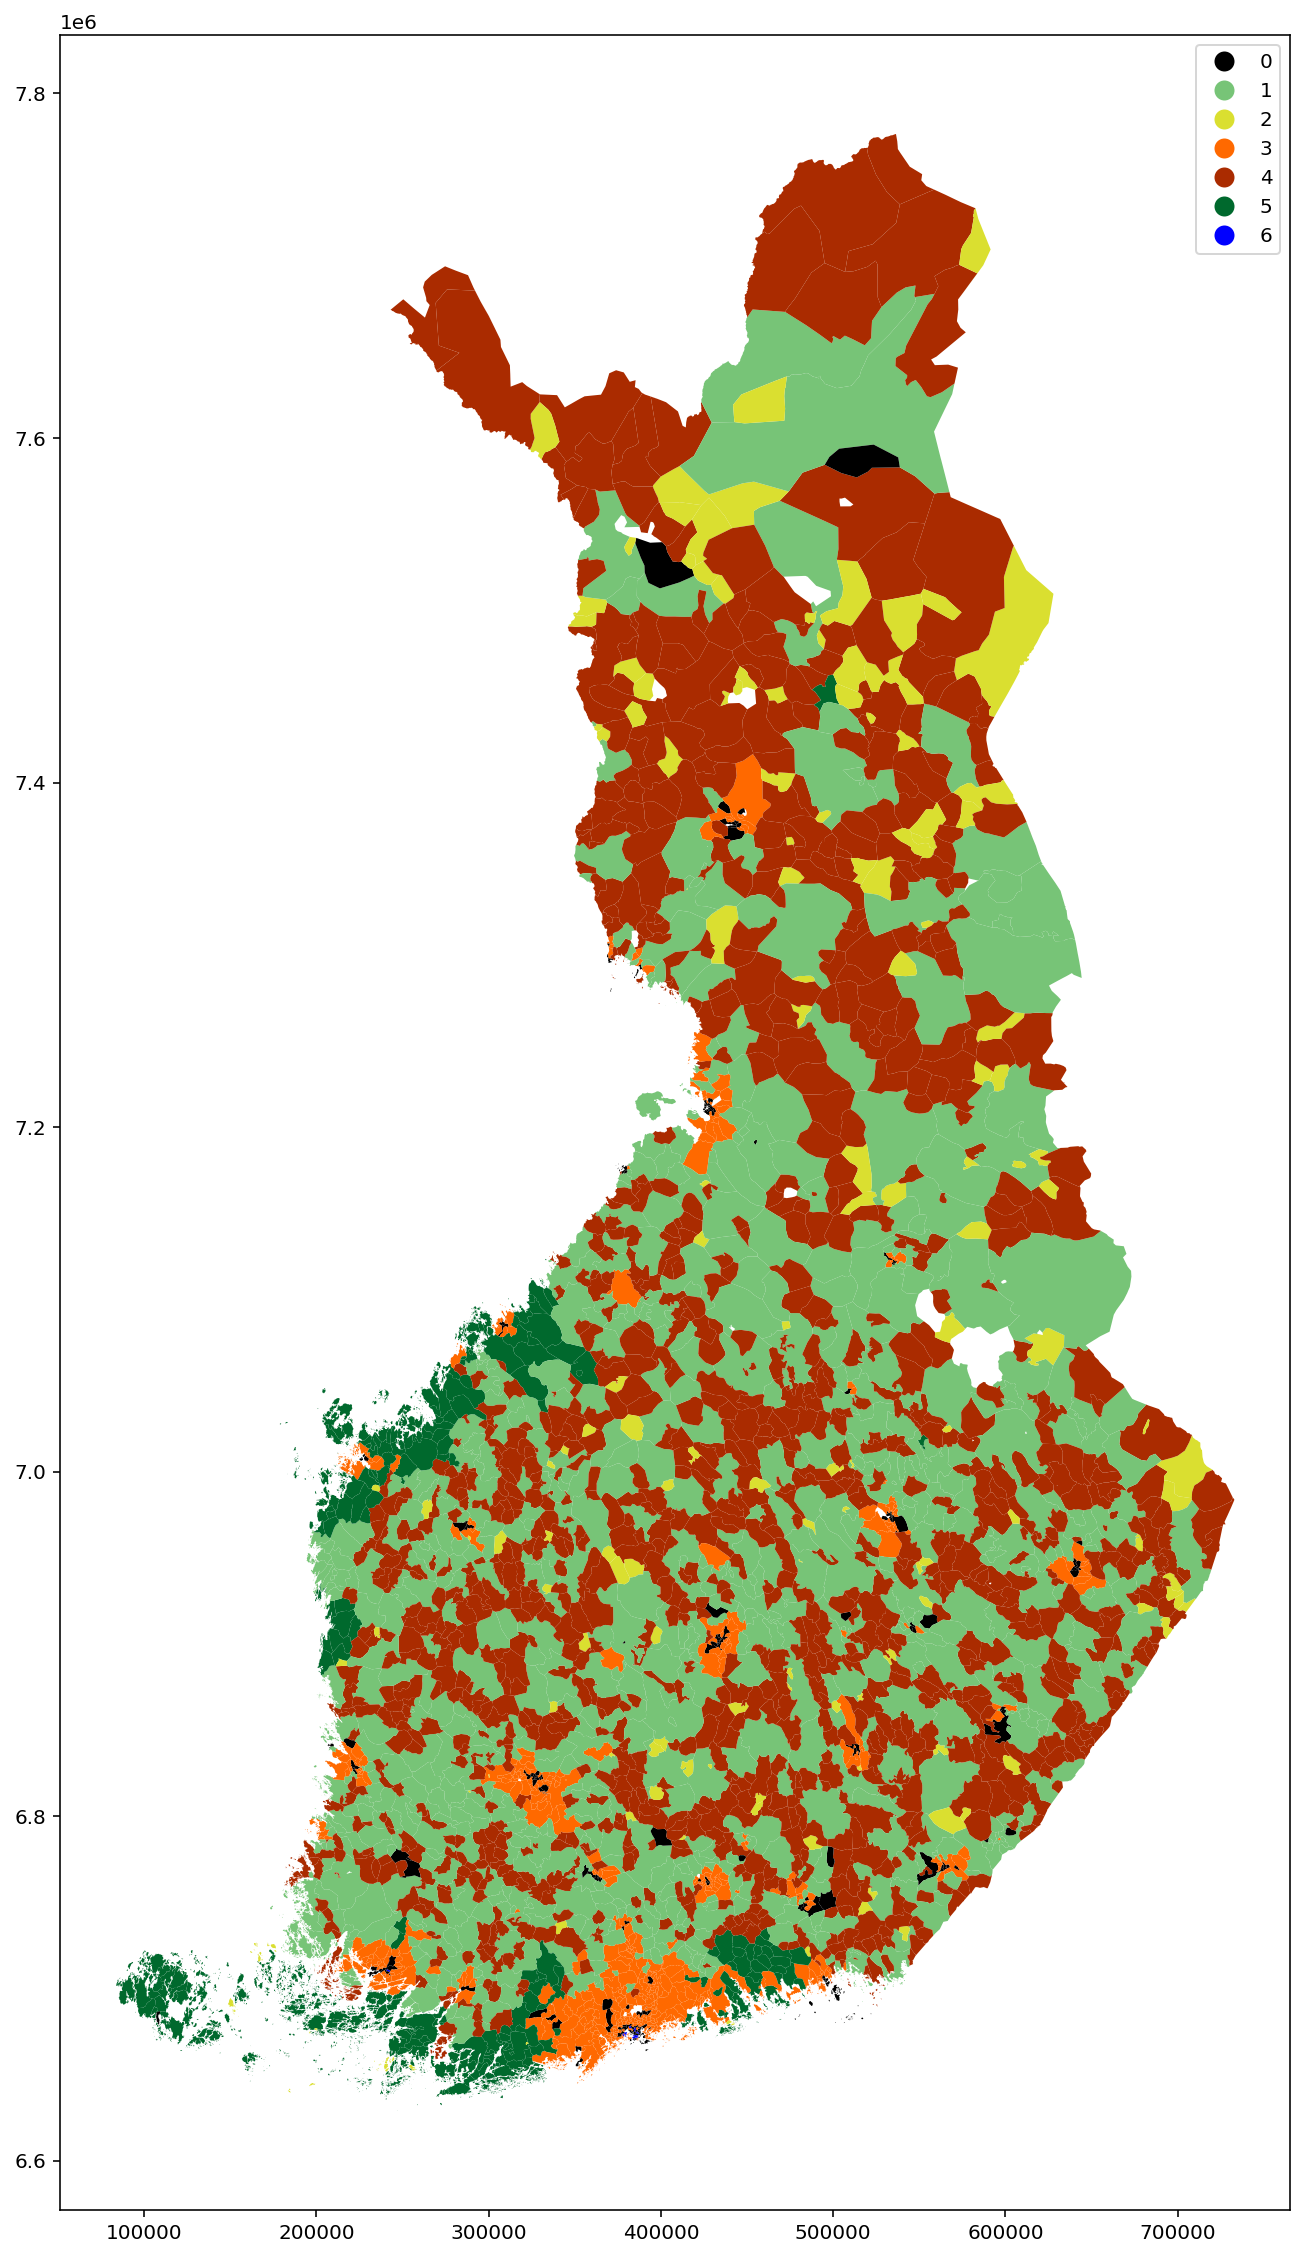

In [4]:
import geopandas
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('my cmap', ['black', 'lightgreen', 'gold',  'red',  'green', 'blue'])
draw = geopandas.GeoDataFrame(pd.DataFrame(data[['cluster', 'geometry']], dtype=object),geometry='geometry')
draw.plot(column='cluster', cmap=cmap, legend=True, figsize=(20,20))

In [5]:
#set values to feature engineering attributes

test_size = 0.3
metric = 'rmse'
Skfold=False
Verbose = False
testing=True
scaled = False

initial_params = {
        #Initial xgboost parameters to be automatically tuned
        'objective':'binary:hinge',
        'booster' : 'gbtree',
        'eval_metric' : metric,
        'seed' : 42
        }

filename = 'clusters_gaussian_'

list_of_parties = ['VIHR', 'KOK', 'SDP', 'KD', 'KESK', 'RKP', 'PS', 'VAS']
selected_parties = list_of_parties
included_col_start = 'Ääniosuus '
all_included_columns = create_target_columns(list_of_parties, included_col_start)
target_col='cluster'
data, list_of_targets, target_col_start = develop_target_category(data, target_col)
target = create_target_columns(list_of_targets, target_col_start)

In [6]:
data, X, y, test, X_test, y_test_pred, model_list, model_params, explainer_list, shap_values, features_dict = create_shap_values_via_xgboost(path,
                               filename,
                               data,
                               data,
                               target,
                               initial_params,
                               numeric_features=numeric_features,
                               categorical_features=categorical_features,
                               scaled=scaled,
                               test_size=test_size,
                               Skfold=Skfold,
                               Verbose=Verbose,
                               testing=testing)


Category__cluster_0
Initial parameters:
{'objective': 'binary:hinge', 'booster': 'gbtree', 'eval_metric': 'rmse', 'seed': 42}

[0]	train-rmse:0.96873	test-rmse:0.96922
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[6]	train-rmse:0.03102	test-rmse:0.17408

testing
Unoptimized xgb.cv params xgb.cv params: rmse: 0.15311740000000001


KeyboardInterrupt: 

In [ ]:
list_of_targets

In [ ]:
columns = 15
scaled = False
included_columns = ['Miehet, 2018 (HE) osuudesta asukkaat']
samples = 5
show_cols = ['Postinumero','nimi', 'muncipality_name','Asukkaat yhteensä, 2018 (HE)', 'Suurin_puolue']

In [ ]:
compare_to, t = create_compare(target_col_start, 0, data)
stats_data, k, col_list = show_all_results(compare_to, data, X, y[t], model_list[t], vaalidata, shap_values[t], t, columns, all_included_columns, show_cols, scaled=scaled, included_columns=included_columns, samples=samples)

In [ ]:
compare_to, t = create_compare(target_col_start, 1, data)
stats_data, k, col_list = show_all_results(compare_to, data, X, y[t], model_list[t], vaalidata, shap_values[t], t, columns, all_included_columns, show_cols, scaled=scaled, included_columns=included_columns, samples=samples)

In [ ]:
compare_to, t = create_compare(target_col_start, 2, data)
stats_data, k, col_list = show_all_results(compare_to, data, X, y[t], model_list[t], vaalidata, shap_values[t], t, columns, all_included_columns, show_cols, scaled=scaled, included_columns=included_columns, samples=samples)

In [ ]:
compare_to, t = create_compare(target_col_start, 3, data)
stats_data, k, col_list = show_all_results(compare_to, data, X, y[t], model_list[t], vaalidata, shap_values[t], t, columns, all_included_columns, show_cols, scaled=scaled, included_columns=included_columns, samples=samples)

In [ ]:
compare_to, t = create_compare(target_col_start, 4, data)
stats_data, k, col_list = show_all_results(compare_to, data, X, y[t], model_list[t], vaalidata, shap_values[t], t, columns, all_included_columns, show_cols, scaled=scaled, included_columns=included_columns, samples=samples)